In [15]:
class Piece():
    def __init__(self, color, isKing, r, c):
        self.color = color  # Color of the piece
        self.isKing = isKing  # Bool to check if it is king
        # Coordinates of the piece
        self.c = c
        self.r = r
        self.legalMovesArr = []

    def __str__(self):
        print("Color: " + str(self.color))
        print("King: " + str(self.isKing))
        print("Row: " + str(self.r) + "Col: " + str(self.c))
        return ""

    def move(self, row, col):
        self.row = row
        self.col = col

    def make_king(self):
        self.isKing = True
    
    def checkClass(self,item):
        return isinstance(item, Piece)

In [16]:
# Enviroment
from collections import deque
import piece as pm

class Board():
    def __init__(self):
        self.board = [[0] * 8 for _ in range(8)]
        self.rows = 8
        self.cols = 8
        self.blackPieces = set()
        self.whitePieces = set()
        self.whiteCaptures = {}
        self.blackCaptures = {}
        self.blackKings = 0
        self.whiteKings = 0
        self.kingRowWhite = 4 
        self.kingRowBlack = 4
        self.jumpLock = False
        self.startGameBoard()
        self.turn = False
        self.inGame = True
        

    def __str__(self):
        for i in range(-1,8):
            if i == -1:
                print(" " , end= " ") 
            else:
                print(str(i) , end= " ")
        print()
        for row in range(8):
            print(str(row), end = " ")
            for col in range(8):
                p = self.board[row][col]
                if (isinstance(p, pm.Piece)):
                    if p.color:
                        if p.isKing:
                            print("W", end= " ")
                        else:
                            print("w", end= " ")
                    else:
                        if p.isKing:
                            print("B", end=" ")
                        else:
                            print("b", end= " ")
                else:
                    print("-", end= " ")
            print()
        return ""

    def legalMove(self, piece):
        wC = self.whiteCaptures
        bC = self.blackCaptures
        # check forward moves are for all pieces
        new_moves = []
        c = piece.c
        r = piece.r
        if (piece.color or piece.isKing):  #if piece is white
            if (c > 0) and r < 7:  #if it can go left diagonal down
                left_spot = self.board[r + 1][c - 1]
                if left_spot == 0:
                    new_moves.append((r + 1, c - 1))
                else:
                    if(left_spot.color == False and (c - 1 > 0) and r + 1 < 7 and piece.isKing == False):
                        if self.board[r + 2][c - 2] == 0:
                            self.whiteCaptures[(piece.r,piece.c)] = (left_spot.r,left_spot.c)
                        else:
                            if(self.both_in(self.whiteCaptures,(piece.r,piece.c),(left_spot.r,left_spot.c))):
                                del self.whiteCaptures[(piece.r,piece.c)]
                    elif(piece.isKing and (c - 1 > 0) and r + 1 < 7):
                        if(left_spot.color != piece.color):
                            if self.board[r + 2][c - 2] == 0:
                                if(piece.color == False):
                                    self.blackCaptures[(piece.r,piece.c)] = (left_spot.r,left_spot.c)
                                else:
                                    self.whiteCaptures[(piece.r,piece.c)] = (left_spot.r,left_spot.c)
                            else:
                                if(self.both_in(self.blackCaptures,(piece.r,piece.c),(left_spot.r,left_spot.c))):
                                    del self.blackCaptures[(piece.r,piece.c)]
                                if(self.both_in(self.whiteCaptures,(piece.r,piece.c),(left_spot.r,left_spot.c))):
                                    del self.whiteCaptures[(piece.r,piece.c)]
            if (c < 7) and r < 7:  # if it can go right diagonal down
                right_spot = self.board[r + 1][c + 1]
                if (right_spot == 0):
                    new_moves.append((r + 1, c + 1))
                else:
                    if(right_spot.color == False and (c + 1 < 7) and r + 1 < 7 and piece.isKing == False):
                        if self.board[r + 2][c + 2] == 0:
                            self.whiteCaptures[(piece.r,piece.c)] = (right_spot.r,right_spot.c)
                        else:
                            if(self.both_in(self.whiteCaptures,(piece.r,piece.c),(right_spot.r,right_spot.c))):
                                del self.whiteCaptures[(piece.r,piece.c)]
                    elif(piece.isKing and (c + 1 < 7) and r + 1 < 7) :
                        if(right_spot.color != piece.color):
                            if self.board[r + 2][c + 2] == 0:
                                if(piece.color == False):
                                    self.blackCaptures[(piece.r,piece.c)] = (right_spot.r,right_spot.c)
                                else:
                                    self.whiteCaptures[(piece.r,piece.c)] = (right_spot.r,right_spot.c)
                            else:
                                if(self.both_in(self.blackCaptures,(piece.r,piece.c),(right_spot.r,right_spot.c))):
                                    del self.blackCaptures[(piece.r,piece.c)]
                                if(self.both_in(self.whiteCaptures,(piece.r,piece.c),(right_spot.r,right_spot.c))):
                                    del self.whiteCaptures[(piece.r,piece.c)]
                        
        if(piece.color == False or piece.isKing):  #if piece is black
            if c > 0 and r > 0:  #if it can go left diagonal up
                left_spot = self.board[r - 1][c - 1]
                if left_spot == 0:
                    new_moves.append((r - 1, c - 1))
                else:
                    if(left_spot.color and c-1 > 0 and r-1 > 0 and piece.color == False):
                        if self.board[r-2][c-2] == 0:
                            self.blackCaptures[(piece.r,piece.c)] = (left_spot.r,left_spot.c)
                        else:
                            if(self.both_in(self.blackCaptures,(piece.r,piece.c),(left_spot.r,left_spot.c))):
                                del self.blackCaptures[(piece.r,piece.c)]
                    elif(piece.isKing and c-1 > 0 and r-1 > 0):
                        if(left_spot.color != piece.color):
                            if self.board[r - 2][c - 2] == 0:
                                if(piece.color == False):
                                    self.blackCaptures[(piece.r,piece.c)] = (left_spot.r,left_spot.c)
                                else:
                                    self.whiteCaptures[(piece.r,piece.c)] = (left_spot.r,left_spot.c)
                            else:
                                if(self.both_in(self.blackCaptures,(piece.r,piece.c),(left_spot.r,left_spot.c))):
                                    del self.blackCaptures[(piece.r,piece.c)]
                                if(self.both_in(self.whiteCaptures,(piece.r,piece.c),(left_spot.r,left_spot.c))):
                                    del self.whiteCaptures[(piece.r,piece.c)]
            if (c < 7 and r > 0):  #if it can go right diagonal up
                right_spot = self.board[r - 1][c + 1]
                if (right_spot == 0):
                    new_moves.append((r - 1, c + 1))
                else:
                    if(right_spot.color and c+1 < 7 and r-1 > 0 and piece.color == False):
                        if self.board[r-2][c+2] == 0:
                            self.blackCaptures[(piece.r,piece.c)] = (right_spot.r,right_spot.c)
                        else:
                            if(self.both_in(self.blackCaptures,(piece.r,piece.c),(right_spot.r,right_spot.c))):
                                del self.blackCaptures[(piece.r,piece.c)]
                    elif(c+1 < 7 and r-1 > 0 and piece.isKing):
                        if(right_spot.color != piece.color):
                            if self.board[r-2][c+2] == 0:
                                if(piece.color == False):
                                    self.blackCaptures[(piece.r,piece.c)] = (right_spot.r,right_spot.c)
                                else:
                                    self.whiteCaptures[(piece.r,piece.c)] = (right_spot.r,right_spot.c)
                            else:
                                if(self.both_in(self.blackCaptures,(piece.r,piece.c),(right_spot.r,right_spot.c))):
                                    del self.blackCaptures[(piece.r,piece.c)]
                                if(self.both_in(self.whiteCaptures,(piece.r,piece.c),(right_spot.r,right_spot.c))):
                                    del self.whiteCaptures[(piece.r,piece.c)]
        piece.legalMovesArr = new_moves

        if(self.jumpLock):
            self.whiteCaptures = wC
            self.blackCaptures = bC

        

    def both_in(self,dict,tup1,tup2):
        if(tup1 in dict.keys() and tup2 in dict.values()):
            return True
        else:
            return False
    
    def update_board(self):
        for curr_row in range(8):
            for curr_col in range(8):
                if isinstance(self.board[curr_row][curr_col], pm.Piece):
                    self.legalMove(self.board[curr_row][curr_col])


    def move(self, piece, newR, newC):
        self.legalMove(piece)
        if(self.turn == piece.color):
            if(not piece.color and len(self.blackCaptures) > 0):
                #print("you have to jump")
                pass
            else:
                if (newR, newC) in piece.legalMovesArr:
                    oldR, oldC = piece.r, piece.c

                    if oldR == 0 and not piece.isKing and piece.color:
                        self.kingRowWhite -= 1
                    if oldR == 7 and not piece.isKing and not piece.color:
                        self.kingRowBlack -= 1

                    newPiece = pm.Piece(piece.color, piece.isKing, newR, newC)
                    self.board[piece.r][piece.c] = 0
                    piece.r, piece.c = newR, newC
                    self.board[newR][newC] = newPiece

                    # King
                    if ((newR == 0 and not piece.color) or (newR == 7 and piece.color) and (not piece.isKing)):
                        newPiece.isKing = True
                        if(piece.color):
                            self.whiteKings += 1
                            if(len(self.whiteCaptures) > 0):
                                self.change_turn()
                        else:
                            self.blackKings += 1
                            if(len(self.blackCaptures) > 0):
                                self.change_turn()
                            
                    
                    self.legalMove(newPiece)
                    self.check_corners(newR,newC)

                    #update neighbors
                    self.check_rows(newPiece.r,newPiece.c)

                    self.check_rows(piece.r,piece.c)

                    self.updatePieces((oldR,oldC), (newPiece.r,newPiece.c))

                    self.change_turn()
                


    def change_turn(self):
        if self.turn:
            self.turn = False
        else:
            self.turn = True

    def check_rows(self,row,col):
        row_max = min(7,row + 2)
        row_min = max(0,row - 2)
        col_max = min(7,col+2)
        col_min = max(0,col-2)

        for curr_row in range(row_min,row_max+1):
            for curr_col in range(col_min,col_max+1):
                if isinstance(self.board[curr_row][curr_col], pm.Piece):
                    self.legalMove(self.board[curr_row][curr_col])


            

    def check_corners(self,row,col):
        if row < 7 and col > 0 :            
            if isinstance(self.board[row + 1][col - 1], pm.Piece):
                self.legalMove(self.board[row + 1][col - 1])
        if row < 7 and col < 7:
            # down right
            if isinstance(self.board[row + 1][col + 1], pm.Piece):
                self.legalMove(self.board[row + 1][col + 1])
        if row > 0 and col > 0:            
            if isinstance(self.board[row - 1][col - 1], pm.Piece):
                self.legalMove(self.board[row - 1][col - 1])
                # up right
        if row > 0 and col < 7:
            if isinstance(self.board[row - 1][col + 1], pm.Piece):
                self.legalMove(self.board[row - 1][col + 1])
                

    def updatePieces(self,old_piece,new_piece):
        if old_piece in self.whitePieces:
            self.whitePieces.remove(old_piece)
            self.whitePieces.add(new_piece)
        if old_piece in self.blackPieces:
            self.blackPieces.remove(old_piece)
            self.blackPieces.add(new_piece)

    def lostPiece(self, takenSpot):
        if takenSpot in self.whitePieces:
            self.whitePieces.remove(takenSpot)
        if takenSpot in self.blackPieces:
            self.blackPieces.remove(takenSpot)


    def jump(self, piece1, piece2):
        p1 = self.board[piece1[0]][piece1[1]]

        if self.turn == p1.color:
            # piece1 takes over piece2
                # white, (down right) or (down left)
                if piece1[0] == 0 and not self.board[piece1[0]][piece1[1]].isKing and self.board[piece1[0]][piece1[1]].color:
                    self.kingRowWhite -= 1
                if piece1[0] == 7 and not self.board[piece1[0]][piece1[1]].isKing and not self.board[piece1[0]][piece1[1]].color:
                    self.kingRowBlack -= 1
                
                new_r = ((piece2[0] - piece1[0]) * 2) + piece1[0]
                new_c = ((piece2[1] - piece1[1]) * 2) + piece1[1]
                if(self.board[piece2[0]][piece2[1]].isKing):
                    if(self.board[piece2[0]][piece2[1]].color):
                        self.whiteKings -=1
                    else:
                        self.blackKings -=1

                oldPiece = self.board[piece1[0]][piece1[1]]
                newPiece = pm.Piece(oldPiece.color, oldPiece.isKing, new_r, new_c)

                self.blackCaptures = {}
                self.whiteCaptures = {}
                self.board[new_r][new_c] = newPiece
                self.board[piece1[0]][piece1[1]] = 0
                self.board[piece2[0]][piece2[1]] = 0
                self.legalMove(self.board[new_r][new_c])


                #old placement update
                self.check_rows(oldPiece.r,oldPiece.c)
                #new placement update
                self.check_rows(new_r,new_c)
                #eaten placement update
                self.check_rows(piece2[0],piece2[1])
                
                self.updatePieces((oldPiece.r,oldPiece.c),(new_r,new_c))
                self.lostPiece((piece2[0],piece2[1]))

                if(self.board[new_r][new_c].isKing):
                    if(new_r == 0 and self.board[new_r][new_c].color):
                        self.kingRowWhite += 1
                    elif(new_r == 7 and self.board[new_r][new_c].color == False):
                        self.kingRowBlack += 1
                
                if ((new_r == 0 or new_r == 7) and (self.board[new_r][new_c].isKing == False)):
                    self.board[new_r][new_c].isKing = True
                    
                    self.change_turn()
                else:
                    if self.turn:
                        if(len(self.whiteCaptures) > 0):
                            if((newPiece.r,newPiece.c) in self.whiteCaptures.keys()):
                                val = self.whiteCaptures[(newPiece.r,newPiece.c)]
                                self.whiteCaptures = {(newPiece.r,newPiece.c):val}
                                self.jumpLock = True
                            else:
                                self.jumpLock = False
                                self.change_turn()
                        else:
                            self.jumpLock = False
                            self.change_turn()
                    else:
                        if(len(self.blackCaptures) > 0):
                            if((newPiece.r,newPiece.c) in self.blackCaptures.keys()):
                                val = self.blackCaptures[(newPiece.r,newPiece.c)]
                                self.blackCaptures = {(newPiece.r,newPiece.c):val}
                                self.jumpLock = True
                            else:
                                self.jumpLock = False
                                self.change_turn()
                        else:
                            self.jumpLock = False
                            self.change_turn()

        else:
            if(not self.turn):
                #print("you have to jump")
                pass


            

        if len(self.whitePieces) == 0:
            #print("black is the winner")
            self.inGame = False
        if len(self.blackPieces) == 0:
            #print("white is the winner")
            self.inGame = False


    def get_all_possible_moving_pieces(self,color):
        list_of_pieces = []
        if(color == False):
            for i in self.blackPieces:
                x = self.returnBoardLegalMoves(i[0],i[1])
                if(len(x) > 0):
                    list_of_pieces.append(i)
            return list_of_pieces
        else:
            for i in self.whitePieces:
                x = self.returnBoardLegalMoves(i[0],i[1])
                if(len(x) > 0):
                    list_of_pieces.append(i)
            return list_of_pieces


    def winner(self):
        if(self.inGame):
            return None
        else:
            return "DONE"



    def startGameBoard(self):
        counter = 0
        for i in range(64):
            if (((i // 8) + (i % 8)) % 2) == 1:
                if counter < 24:  ##True Parameter == White
                    self.board[i // 8][i % 8] = pm.Piece(True, False, i // 8,i % 8)
                    self.whitePieces.add((i // 8,i % 8))
                if counter >= 40:  ##False Parameter == Black
                    self.board[i // 8][i % 8] = pm.Piece(False, False, i // 8, i % 8)
                    self.blackPieces.add((i // 8,i % 8))
            counter += 1
        self.update_board()
    
    def returnBoardLegalMoves(self,row, col):
        p1 = self.board[row][col]
        tup = (p1.r,p1.c)
        #white
        if(p1.color):
            if(len(self.whiteCaptures) > 0):
                if(tup in self.whiteCaptures.keys()):
                    s = set()
                    s.add(self.whiteCaptures[tup])
                    return s
                else:
                    return []
        else:
            if(len(self.blackCaptures) > 0):
                if(tup in self.blackCaptures.keys()):
                    d = set()
                    d.add(self.blackCaptures[tup])
                    return d
                else:
                    return []
                    
        return p1.legalMovesArr

    def getBoardCoord(self, row , col):
        return self.board[row][col]
    def getBoardColor(self, row , col):
        return self.board[row][col].color
    def getKingsRow(self, color):
        return self.kingRowWhite if color else self.kingRowBlack








In [17]:
import board
from collections import deque
from copy import deepcopy
from matplotlib import pyplot as plt



def heuristic(board):
    finalHeristic = 0
    numMax = (len(board.whitePieces) - board.whiteKings)*3
    numMin = (len(board.blackPieces) - board.blackKings)*3
    whiteKingRow = board.getKingsRow(True)
    blackKingRow = board.getKingsRow(False)
    finalHeristic = (numMax-numMin) + (board.whiteKings*5-board.blackKings*5) + (whiteKingRow - blackKingRow)
    return finalHeristic

def heuristicREVERSE(board):
    finalHeristic = 0
    numMin = (len(board.whitePieces) - board.whiteKings)*3
    numMax = (len(board.blackPieces) - board.blackKings)*3
    whiteKingRow = board.getKingsRow(True)
    blackKingRow = board.getKingsRow(False)
    finalHeristic = (numMax-numMin) + (board.blackKings*5-board.whiteKings*5) + (blackKingRow - whiteKingRow) 
    return finalHeristic

def calculateIslands(board, numPieces, currentColor):
    count = 0
    visited = set()
    for i in numPieces:
        if (i[0], i[1]) in visited:
            continue
        queue = deque([i])
        while queue:
            currentNode = queue.pop()
            currentRow = currentNode[0]
            currentCol = currentNode[1]
            visited.add((currentRow, currentCol))
            if (currentRow + 1, currentCol + 1) not in visited and currentRow + 1 < 8 and currentCol + 1 < 8 and board.getBoardCoord(currentRow + 1,currentCol + 1) != 0 and board.getBoardColor(currentRow + 1,currentCol + 1) == currentColor:
                queue.appendleft((currentRow + 1,currentCol + 1))
            if (currentRow + 1, currentCol - 1) not in visited and currentRow + 1 < 8 and currentCol - 1 >= 0 and board.getBoardCoord(currentRow + 1,currentCol - 1) != 0 and board.getBoardColor(currentRow + 1,currentCol - 1) == currentColor:
                queue.appendleft((currentRow + 1,currentCol - 1))
            if (currentRow - 1, currentCol - 1) not in visited and currentRow - 1 >= 0 and currentCol - 1 >= 0 and board.getBoardCoord(currentRow - 1,currentCol - 1) != 0 and board.getBoardColor(currentRow - 1,currentCol - 1) == currentColor:
                queue.appendleft((currentRow - 1,currentCol - 1))
            if (currentRow - 1, currentCol + 1) not in visited and currentRow - 1 >= 0 and currentCol + 1 < 8 and board.getBoardCoord(currentRow - 1,currentCol + 1) != 0 and board.getBoardColor(currentRow - 1,currentCol + 1) == currentColor:
                queue.appendleft((currentRow - 1,currentCol + 1))
        count += 1
    return count


def movesListGeneration(board, color):
    listOfBoards = []
    if color:
        for piece in board.whitePieces:
            valid_moves = board.returnBoardLegalMoves(piece[0], piece[1])
            if (isinstance(valid_moves,list)):
                for move in valid_moves:
                    temp_board = deepcopy(board)
                    temp_piece = temp_board.getBoardCoord(piece[0], piece[1])
                    temp_board.move(temp_piece, move[0], move[1])
                    listOfBoards.append(temp_board)
            else:
                for move in valid_moves:
                    temp_board = deepcopy(board)
                    temp_board.jump((piece[0],piece[1]), move)
                    listOfBoards.append(temp_board)
            
    else:
        for piece in board.blackPieces:
            valid_moves = board.returnBoardLegalMoves(piece[0], piece[1])
            if (isinstance(valid_moves,list)):
                for move in valid_moves:
                    temp_board = deepcopy(board)
                    temp_piece = temp_board.getBoardCoord(piece[0], piece[1])
                    temp_board.move(temp_piece, move[0], move[1])
                    listOfBoards.append(temp_board)
            else:
                for move in valid_moves:
                    temp_board = deepcopy(board)
                    temp_board.jump((piece[0],piece[1]), move)
                    listOfBoards.append(temp_board)

    return listOfBoards

def input_check(list):
        while(' ' in list):
            list.remove(' ')
        while( '' in list):
            list.remove('')
        if len(list) == 2:
            for i in list:
                if(i.isdigit() == False):
                    return False
            return True
        else:
            return False

def minimax(position, depth, max_player,alpha,beta):
    if depth == 0 or position.winner() != None:
        return heuristic(position), position
    if max_player:
        maxEval = float('-inf')
        next_move = None
        for move in movesListGeneration(position, max_player):
            evaluation = minimax(move, depth-1, (not max_player),alpha,beta)[0]
            maxEval = max(maxEval, evaluation)
            alpha = max(alpha, maxEval)
            if beta <= alpha:
                break
            if maxEval == evaluation:
                next_move = move
        return maxEval, next_move
        
    else:
        minEval = float('inf')
        next_move = None
        for move in movesListGeneration(position, (not max_player)):
            evaluation = minimax(move, depth-1, max_player,alpha,beta)[0]
            minEval = min(minEval, evaluation)
            beta = min( beta, minEval)
            if beta <= alpha:
                break
            if minEval == evaluation:
                next_move = move
        return minEval, next_move


def minimaxREVERSE(position,depth,max_player,alpha,beta):
    if depth == 0 or position.winner() != None:
        return heuristicREVERSE(position), position
    if(max_player == False):
        maxEval = float('-inf')
        next_move = None
        for move in movesListGeneration(position, max_player):
            evaluation = minimaxREVERSE(move, depth-1, (not max_player) ,alpha,beta)[0]
            maxEval = max(maxEval, evaluation)
            alpha = max(alpha, maxEval)
            if beta <= alpha:
                break
            if maxEval == evaluation:
                next_move = move
            return maxEval, next_move
    else:
        minEval = float('inf')
        next_move = None
        for move in movesListGeneration(position, (not max_player)):
            evaluation = minimaxREVERSE(move, depth-1, max_player,alpha,beta)[0]
            minEval = min(minEval, evaluation)
            beta = min( beta, minEval)
            if beta <= alpha:
                break
            if minEval == evaluation:
                next_move = move
        return minEval, next_move
        

def main():
    x = board.Board()
    h = [] 
    u = []
    god_tester = True
    while(god_tester and x.inGame):
        while(x.turn == False):
            prev_pieces = x.blackPieces
            sVal, x = minimaxREVERSE(x, 2, False,float('-inf'),float('inf'))
            u.append(sVal)
            print("false")
            print(x)
            print('----')
            new_pieces = x.blackPieces
            intersection = new_pieces.intersection(prev_pieces)
            old_spot = prev_pieces - intersection
            new_spot = new_pieces - intersection

            if old_spot == new_spot:
                god_tester = False
                print("false")
                break
            print(x.turn,x.get_all_possible_moving_pieces(x.turn))
            print(x.turn,x.whiteCaptures) 
            print(x.whitePieces,"white pieces")
            if(len(x.whitePieces) == 1):
                for i_for_one in x.whitePieces:
                    print(x.board[i_for_one[0]][i_for_one[1]].legalMovesArr)
            print(x.whiteKings,'w kings')
        
        while(x.turn):
            prev_pieces = x.whitePieces
            if(len(x.whitePieces) == 1 and (6,7) in x.whitePieces):
                x.move(x.board[6][7],7,6)
                print(x.turn)
                print(x.board[7][6].legalMovesArr)
                x.move(x.board[7][6],6,5)
                print(x)
            else:
                val ,x = minimax(x, 5, True,float('-inf'),float('inf'))
                h.append(val)
                
                
                
                print('----')
                print(x.turn, x.get_all_possible_moving_pieces(x.turn))
                print(x.turn, x.blackCaptures) 
                print(x.blackPieces,"black pieces")
                print(x.blackKings,'black kings')
                new_pieces = x.whitePieces
                
                
                intersection = new_pieces.intersection(prev_pieces)
                old_spot = prev_pieces - intersection
                new_spot = new_pieces - intersection

                if old_spot == new_spot:
                    god_tester = False
                    print("true")
                    break



    '''
    while(x.inGame):
        while(x.turn == False):
            print("It is your move! Please type your input as a coordinate with row first and column second")
            print("Example: 0 2 ")
            choices = x.get_all_possible_moving_pieces(x.turn)
            print("Choices",choices)
            sec = input('What piece do you want to move?')
            splitted = sec.split(' ')
            if input_check(splitted):
                moving_piece = x.board[int(splitted[0])][int(splitted[1])]
                pos_moves = x.returnBoardLegalMoves(moving_piece.r,moving_piece.c)
                print(pos_moves)
                sec2 = input('These are your possible moves, where would you like to move?')
                splitted2 = sec2.split(' ')
                if input_check(splitted2):
                    row1 = int(splitted2[0])
                    col1= int(splitted2[1])
                    if (isinstance(pos_moves,list)):
                        if (row1,col1) in pos_moves:
                            x.move(moving_piece,row1,col1)
                    else:
                        x.jump((int(splitted[0]),int(splitted[1])),(row1,col1))
                    print(x)
                else:
                    print("WRONG INPUT TRY AGAIN")
            else:
                print("WRONG INPUT TRY AGAIN")
        while(x.turn):
            prev_pieces = x.whitePieces
            print(x.get_all_possible_moving_pieces(x.turn))
            x = minimax(x, 5, True,float('-inf'),float('inf'))[1]
            print(x)

            new_pieces = x.whitePieces
            
            intersection = new_pieces.intersection(prev_pieces)
            old_spot = prev_pieces - intersection
            new_spot = new_pieces - intersection


            print("The AI has moved a piece from " + str(old_spot) + " to "+ str(new_spot))
        
    '''
   
    

    '''
    while(x.inGame):
        while(x.turn == False):
            
            print("It is your move! Please type your input as a coordinate with row first and column second")
            print("Example: 0 2 ")
            choices = x.get_all_possible_moving_pieces(x.turn)
            print("Choices",choices)
            sec = input('What piece do you want to move?')
            splitted = sec.split(' ')
            if input_check(splitted):
                moving_piece = x.board[int(splitted[0])][int(splitted[1])]
                pos_moves = x.returnBoardLegalMoves(moving_piece.r,moving_piece.c)
                print(pos_moves)
                sec2 = input('These are your possible moves, where would you like to move?')
                splitted2 = sec2.split(' ')
                if input_check(splitted2):
                    row1 = int(splitted2[0])
                    col1= int(splitted2[1])
                    if (isinstance(pos_moves,list)):
                        if (row1,col1) in pos_moves:
                            x.move(moving_piece,row1,col1)
                    else:
                        x.jump((int(splitted[0]),int(splitted[1])),(row1,col1))
                    print(x)
                else:
                    print("WRONG INPUT TRY AGAIN")
            else:
                print("WRONG INPUT TRY AGAIN")
                
                
            # prev_pieces = x.blackPieces
            # x = minimaxREVERSE(x, 5, False,float('-inf'),float('inf'))[1]
            # print("false")
            # print(x)
            # print('----')
            # new_pieces = x.blackPieces
            # intersection = new_pieces.intersection(prev_pieces)
            # old_spot = prev_pieces - intersection
            # new_spot = new_pieces - intersection
            
        while(x.turn):
            
            prev_pieces = x.whitePieces
            if(len(x.whitePieces) == 1 and (6,7) in x.whitePieces):
                x.move(x.board[6][7],7,6)
                #print(x.turn)
                #print(x.board[7][6].legalMovesArr)
                x.move(x.board[7][6],6,5)
                print(x)
            
            

                
                print(x.turn,x.get_all_possible_moving_pieces(x.turn))
                print(x.turn,x.whiteCaptures) 
                print(x.whitePieces,"white pieces")
                if(len(x.whitePieces) == 1):
                    for i_for_one in x.whitePieces:
                        print(x.board[i_for_one[0]][i_for_one[1]].legalMovesArr)
                print(x.whiteKings,'w kings')
            else:
                val, x = minimax(x, 5, True,float('-inf'),float('inf'))
                h.append(val)
                print(h)
                
                
                
                print('----')
                print(x.turn, x.get_all_possible_moving_pieces(x.turn))
                print(x.turn, x.blackCaptures) 
                print(x.blackPieces,"black pieces")
                print(x.blackKings,'black kings')
                new_pieces = x.whitePieces
                
                
                intersection = new_pieces.intersection(prev_pieces)
                old_spot = prev_pieces - intersection
                new_spot = new_pieces - intersection
                if old_spot == new_spot:
                    break
    '''
    return h, u


false
  0 1 2 3 4 5 6 7 
0 - w - w - w - w 
1 w - w - w - w - 
2 - w - w - w - w 
3 - - - - - - - - 
4 - - - b - - - - 
5 b - b - - - b - 
6 - b - b - b - b 
7 b - b - b - b - 

----
True [(2, 1), (2, 7), (2, 3), (2, 5)]
True {}
{(0, 1), (0, 7), (1, 2), (2, 1), (2, 7), (0, 3), (1, 4), (2, 3), (0, 5), (1, 0), (1, 6), (2, 5)} white pieces
0 w kings
----
False [(6, 5), (4, 3), (5, 0), (5, 6), (6, 3), (5, 2)]
False {}
{(7, 4), (6, 5), (4, 3), (6, 1), (7, 0), (6, 7), (7, 6), (5, 0), (5, 6), (7, 2), (6, 3), (5, 2)} black pieces
0 black kings
false
  0 1 2 3 4 5 6 7 
0 - w - w - w - w 
1 w - w - w - w - 
2 - w - w - - - w 
3 - - - - - - w - 
4 - - - b - - - - 
5 b - b - b - b - 
6 - b - b - - - b 
7 b - b - b - b - 

----
True [(2, 1), (1, 4), (2, 3), (3, 6), (1, 6)]
True {}
{(0, 1), (0, 7), (1, 2), (2, 1), (2, 7), (0, 3), (1, 4), (2, 3), (0, 5), (3, 6), (1, 0), (1, 6)} white pieces
0 w kings
----
False [(7, 4), (4, 3), (5, 4), (7, 6), (5, 0), (5, 6), (5, 2)]
False {}
{(7, 4), (4, 3), (6, 1),

----
False [(5, 0), (7, 2), (3, 6), (2, 5)]
False {}
{(5, 0), (7, 2), (3, 6), (2, 5)} black pieces
0 black kings
false
  0 1 2 3 4 5 6 7 
0 - w - w - w - w 
1 - - - - - - - - 
2 - w - - - b - - 
3 - - - - - - b - 
4 - b - - - - - - 
5 - - - - - - - - 
6 - - - - - w - - 
7 W - b - - - - - 

----
True [(0, 1), (0, 7), (2, 1), (6, 5), (0, 3), (0, 5)]
True {}
{(0, 1), (0, 7), (2, 1), (6, 5), (0, 3), (7, 0), (0, 5)} white pieces
0 w kings
----
False [(2, 5), (4, 1), (7, 2), (3, 6)]
False {}
{(2, 5), (4, 1), (7, 2), (3, 6)} black pieces
0 black kings
false
  0 1 2 3 4 5 6 7 
0 - w - w - w - w 
1 - - - - b - - - 
2 - w - - - - - - 
3 - - - - - - b - 
4 - b - - - - - - 
5 - - - - - - - - 
6 - - - - - - - - 
7 W - b - - - W - 

----
True [(0, 3), (0, 5)]
True {(0, 3): (1, 4), (0, 5): (1, 4)}
{(0, 1), (0, 7), (2, 1), (0, 3), (7, 0), (7, 6), (0, 5)} white pieces
1 w kings
----
True [(2, 5)]
True {(3, 6): (2, 5)}
{(7, 2), (4, 1), (3, 6)} black pieces
0 black kings
----
False [(4, 1), (7, 2)]
False

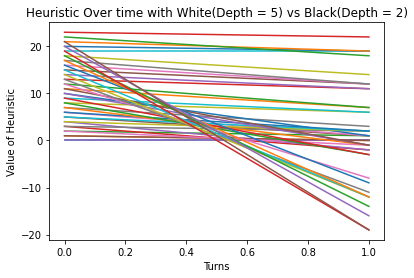

In [14]:
y, z = main()
x = [i for i in range(len(y))]
plt.title("Heuristic Over time with White(Depth = 5) vs Black(Depth = 2)")
plt.xlabel("Turns")
plt.ylabel("Value of Heuristic")
plt.plot((x,y), label = "White")

l = [i for i in range(len(z))]
plt.xlabel("Turns")
plt.ylabel("Value of Heuristic")
plt.plot((l,z), label = "White")
